# Affine Transformation

In [6]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15


def getAffineTransform(original_points, transformed_points):
    p = []
    for x,y in original_points:
        p.append((x,y,1))

    return np.linalg.solve(p, transformed_points).T

def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype=np.int)
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype=np.int)
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
    return img

def warpAffine(img, M, dsize):
    mtr = to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C,mtr.shape[2]))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            i_dst,j_dst = np.dot(M, [i,j,1]).astype(int)
            if i_dst >= 0 and i_dst < R:
                if j_dst >= 0 and j_dst < C:
                    dst[i_dst,j_dst] = mtr[i,j]
            
    return to_img(dst)

In [11]:
img = cv2.imread("1.png")
A = np.array([
    [8.7976964e-01,   3.1245438e-01,  -3.9430589e+01],
    [-1.8389418e-01,   9.3847198e-01,   1.5315784e+02]])

In [12]:
destination_size = (img.shape[1],img.shape[0])
dst = warpAffine(img, A, destination_size)
cv2.imwrite("A_output.png",dst)

True

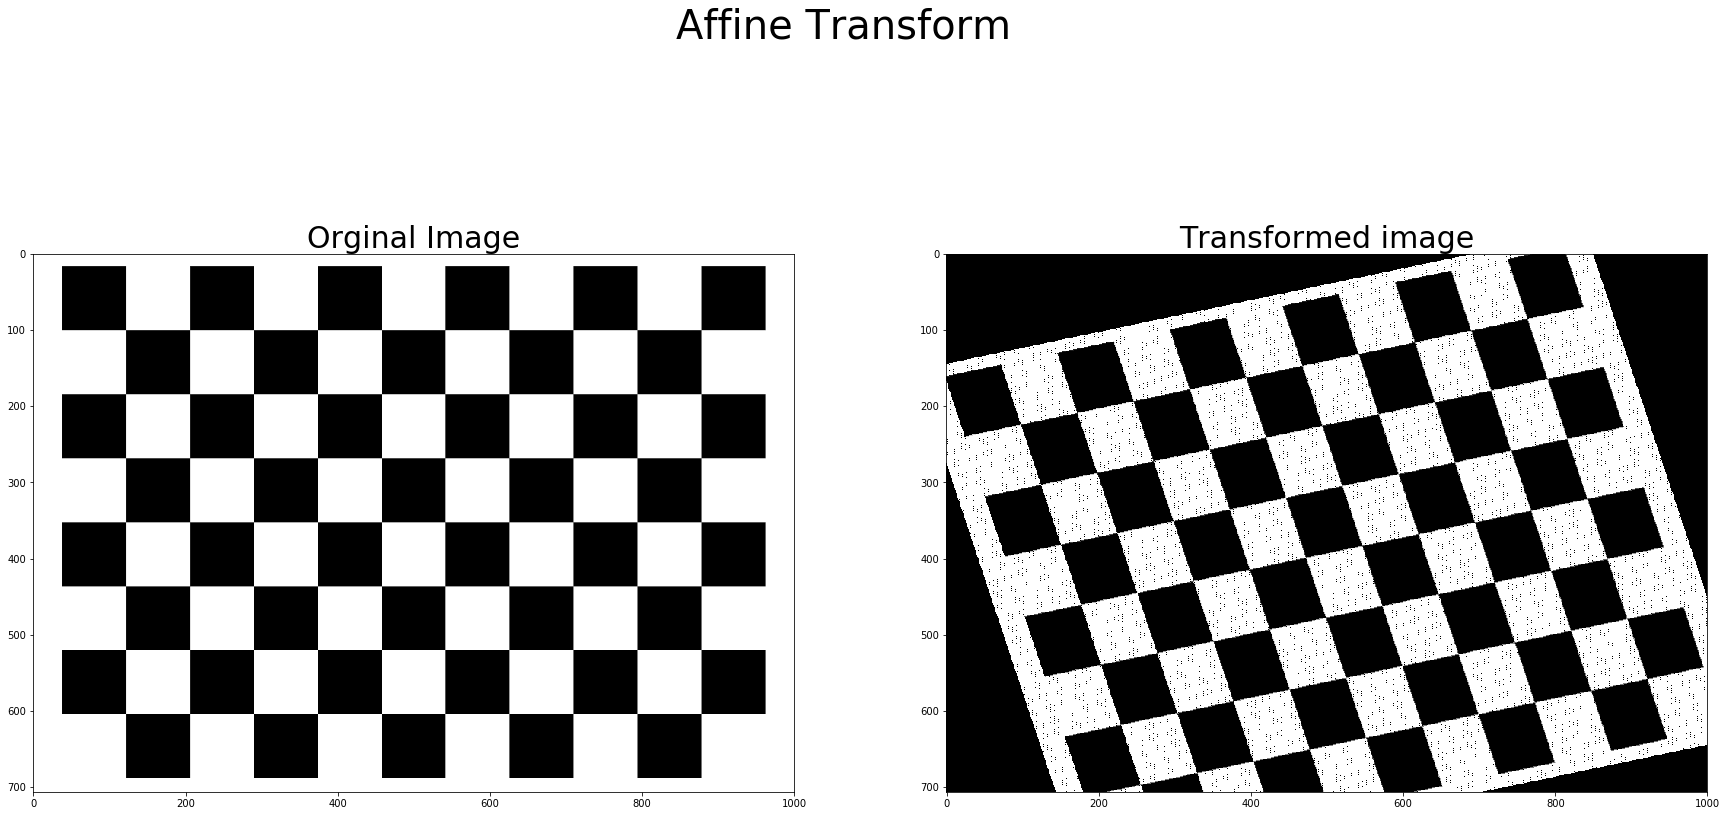

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Affine Transform', fontsize=40)
ax1.set_title('Orginal Image', fontsize=30)
im1 = ax1.imshow(img)
ax2.set_title('Transformed image', fontsize=30)
im2 = ax2.imshow(dst)
plt.show()